## Clustering of iris flower using supervised learning algorthm

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
# lib data manipulations
import numpy as np
import pandas as pd

# lib data visualizaton
import seaborn as sns
import matplotlib.pyplot as plt

# lib data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# lib unsupervised learning
from sklearn.cluster import KMeans

### Step 1. Data Acquisition

In [3]:
# load-dataset
dataset = sns.load_dataset("iris")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# show data dataset
print(dataset)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


### Step 2. Data Visualization

In [5]:
# function scatter plot
def scatter(data, x, y):
  
  # create scatter plots
  fig, ax = plt.subplots(figsize = (8,4))
  sns.scatterplot(data=data, x=x, y=y)

  # set labels
  ax.set_title("", fontsize=14)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.grid(True)
  
  # return values
  plt.tight_layout()
  plt.show()

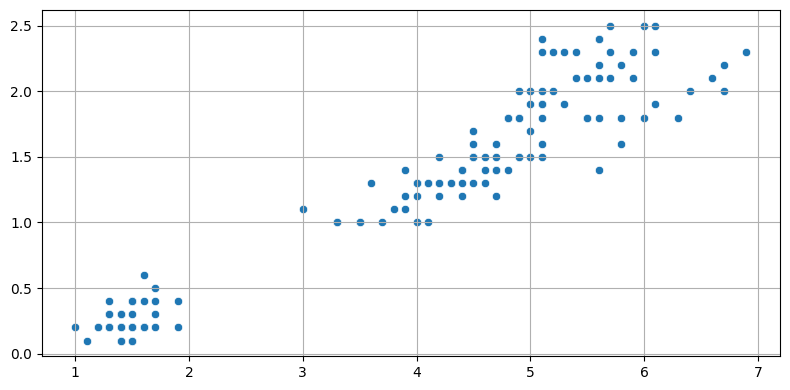

In [6]:
# call func scatterplot
scatter(dataset, "petal_length", "petal_width")

### Step 3. Data Preprocessing

In [7]:
# Set features and Label
x = dataset[["petal_length","petal_width"]].values
y = dataset["species"].values

# show features and label
print(x.shape, y.shape)

(150, 2) (150,)


In [8]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(x)

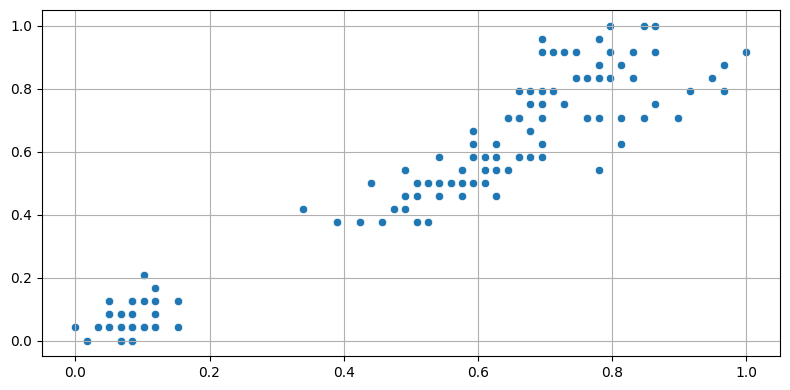

In [9]:
# show results minmax
scatter(None, x=scaled[:, 0:1].flatten(), y=scaled[:, 1:2].flatten())

In [10]:
# split validation
trainX, testX, trainY, testY = train_test_split(
  scaled, y, train_size=0.7, test_size=0.3, random_state=7, shuffle=True
)

In [11]:
# show dimension of data train
print(trainX.shape, trainY.shape)

(105, 2) (105,)


In [12]:
# show dimension of data test
print(testX.shape, testY.shape)

(45, 2) (45,)


### Step 4. Modelling Unsupervised Learning

In [13]:
# search k optimal
clusters = range(1,11)
inertia = []

# elbow method
for k in clusters:
    koptimal = KMeans(n_clusters=k, random_state=42).fit(scaled)
    inertia.append(koptimal.inertia_)

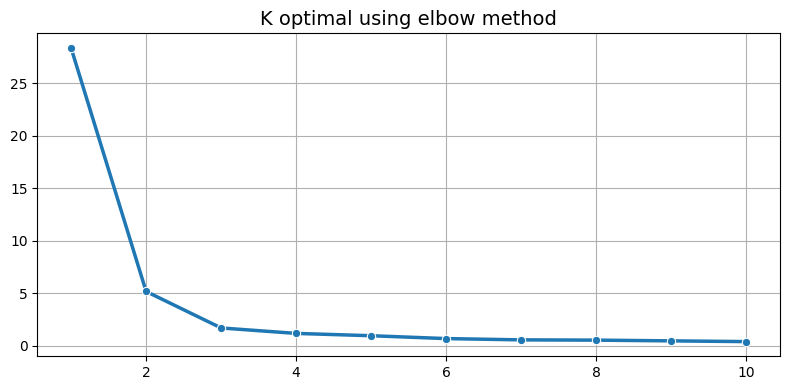

In [14]:
# create scatter plots
fig, ax = plt.subplots(figsize = (8,4))
sns.lineplot(data=None, x=clusters, y=inertia, marker="o", linewidth=2.5)

# set labels
ax.set_title("K optimal using elbow method", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)

# return values
plt.tight_layout()
plt.show()

In [15]:
# create model kmeans clusters
kmeans = KMeans(n_clusters=3, random_state=42).fit(scaled)

In [16]:
# show centroid
centers = kmeans.cluster_centers_
centers

array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

In [17]:
# process predict
y_pred = kmeans.fit_predict(scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

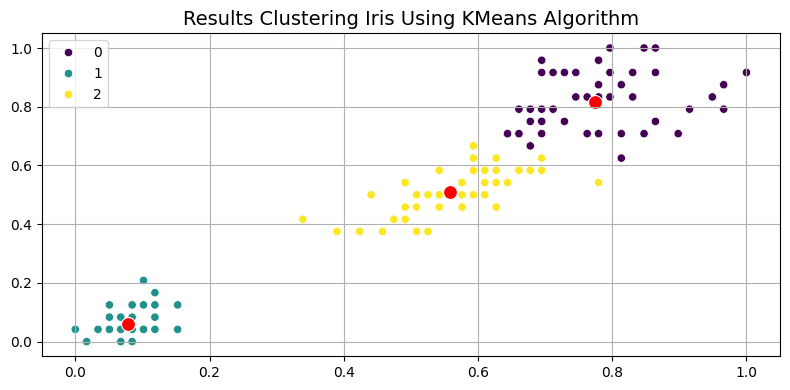

In [18]:
# create scatter plots
fig, ax = plt.subplots(figsize = (8,4))
sns.scatterplot(x=scaled[:,0], y=scaled[:,1], hue=y_pred, palette='viridis')
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='red', s=100,)

# set labels
ax.set_title("Results Clustering Iris Using KMeans Algorithm", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)

# return values
plt.tight_layout()
plt.show()